<a href="https://colab.research.google.com/github/pkchowdhury/DS_BA_Intern_Spark_foundation/blob/main/Task2_Prediction_Using__Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Spark Foundation-GRIP: Data Science & Business Analytics Intern-Nov21
**Task 1:** Prediction Using Unsupervised ML

**Author:** Pallab Chowdhury

**Dataset:** https://bit.ly/3kXTdox

**Problem:** Predict the optimum number of clusters

# Importing the libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Inport Dataset

In [39]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Preprocessing

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

pipe = Pipeline([('scaler', StandardScaler()), ("onehot", OneHotEncoder())])
pipe.fit(df)

Pipeline(steps=[('scaler', StandardScaler()), ('onehot', OneHotEncoder())])

# Finding the optimal value of cluster K

**Using K-means++**

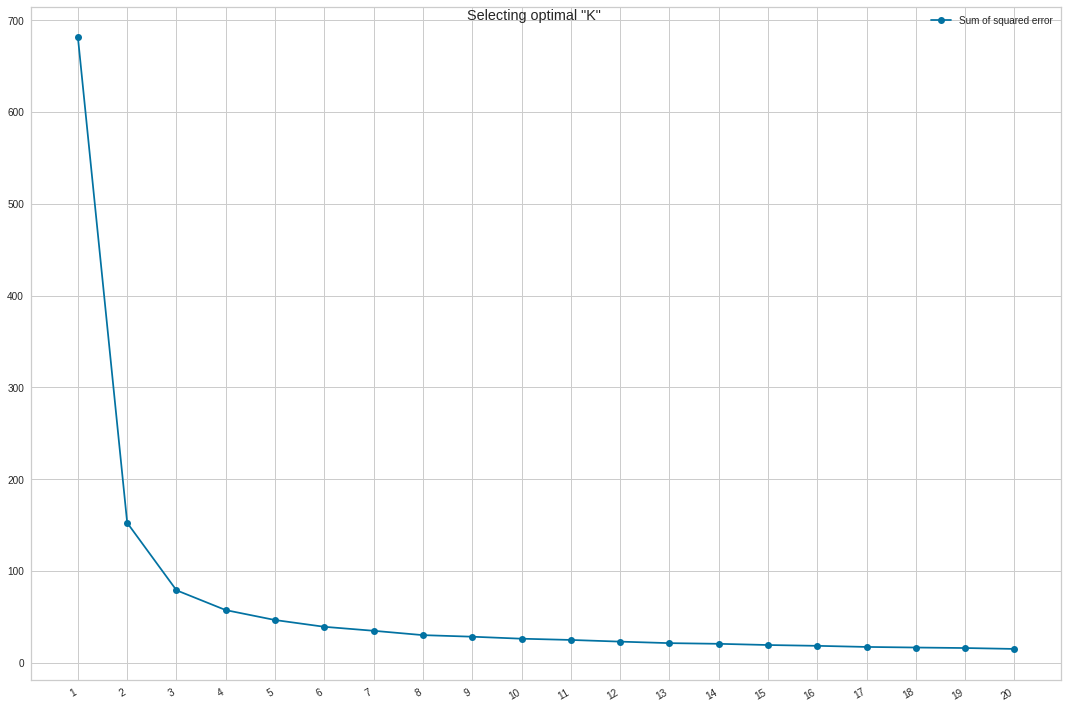

In [41]:
from sklearn.cluster import KMeans

search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(df)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kMeans.predict(df)
        chs = metrics.calinski_harabasz_score(df, cluster)
        ss = metrics.silhouette_score(df, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

**Using yellowbrick**

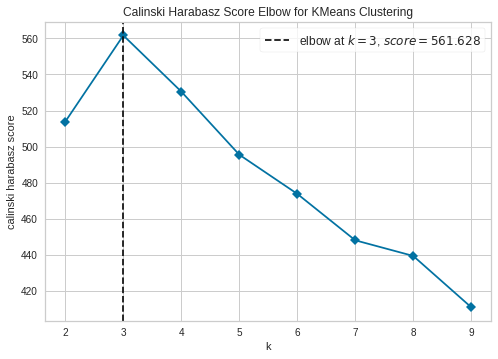

In [42]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import KElbowVisualizer
model = KMeans()
visualizer = visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabasz', timings=False
)

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Using MeanShift**

In [43]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# using MeanShift to get an estimate
bandwidth = estimate_bandwidth(df, 
                               quantile=0.18, 
                               n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, 
               bin_seeding=False, 
               n_jobs=-1, 
               max_iter=1000)
ms.fit(df)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(f"Number of estimated clusters : {n_clusters_}")

Number of estimated clusters : 3


# **We can say that the Optimun clustering needed is 3**